## 교각의 구조

https://2030-view.tistory.com/61

## 안전진단

https://ulsansafety.tistory.com/281

## 시설물 범위

https://www.safety.or.kr/safety/main/contents.do?menuNo=200064#

## 시설물의 안전 및 유지관리 실시 등에 관한 지침

https://www.law.go.kr/%ED%96%89%EC%A0%95%EA%B7%9C%EC%B9%99/%EC%8B%9C%EC%84%A4%EB%AC%BC%EC%9D%98%EC%95%88%EC%A0%84%EB%B0%8F%EC%9C%A0%EC%A7%80%EA%B4%80%EB%A6%AC%EC%8B%A4%EC%8B%9C%EB%93%B1%EC%97%90%EA%B4%80%ED%95%9C%EC%A7%80%EC%B9%A8

In [1]:
# 필요 패키지 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 만져보기
excelFile = 'C:/Users/chunc/Desktop/데이터 샘플/2022_도로_교량_및_터널현황조서.xls'
df = pd.read_excel(excelFile, sheet_name = 1)
df.head()

,도로종류,노선명,시설명,시도,시군구,읍면동,리,총길이,총폭,유효폭,...,경간수,최대경간장,상부구조,하부구조,설계하중,교통량,기관구분1,기관구분2,기관구분3,준공년도
0,고속국도,고속국도12호선,88낙동강교(광주),대구광역시,달성군,논공읍,위천리,812.0,15.7,14.7,...,22.0,60.0,PSCI거더교,NaN,DB-24,17850.0,전문관리기관,한국도로공사,고령지사,1984
1,고속국도,고속국도12호선,88낙동강교(대구),대구광역시,달성군,논공읍,위천리,806.0,15.8,14.9,...,14.0,61.2,강박스거더교,NaN,DB-24,17850.0,전문관리기관,한국도로공사,고령지사,2006
2,고속국도,고속국도25호선,RAMP-A교,전라남도,장성군,남면,삼태리,90.0,13.9,13.0,...,2.0,45.0,PSCI거더교,역 T형식교대,DB-24,20998.0,자치단체,광주,시청,2015
3,고속국도,고속국도25호선,RAMP-H교,전라남도,장성군,남면,삼태리,55.0,7.9,7.0,...,1.0,55.0,강박스거더교,역 T형식교대,DB-24,20998.0,자치단체,광주,종합건설본부,2016
4,고속국도,고속국도25호선,RAMP-I교,전라남도,장성군,남면,삼태리,55.0,7.9,7.0,...,1.0,55.0,강박스거더교,역 T형식교대,DB-24,20998.0,자치단체,광주,종합건설본부,2016


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37078 entries, 0 to 37077
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   도로종류    37078 non-null  object 
 1   노선명     25293 non-null  object 
 2   시설명     37078 non-null  object 
 3   시도      37078 non-null  object 
 4   시군구     37078 non-null  object 
 5   읍면동     37077 non-null  object 
 6   리       27431 non-null  object 
 7   총길이     37078 non-null  float64
 8   총폭      37073 non-null  float64
 9   유효폭     37068 non-null  float64
 10  높이      27714 non-null  float64
 11  경간수     37076 non-null  float64
 12  최대경간장   37077 non-null  float64
 13  상부구조    37078 non-null  object 
 14  하부구조    27618 non-null  object 
 15  설계하중    37078 non-null  object 
 16  교통량     29020 non-null  float64
 17  기관구분1   37078 non-null  object 
 18  기관구분2   37078 non-null  object 
 19  기관구분3   37078 non-null  object 
 20  준공년도    37078 non-null  int64  
dtypes: float64(7), int64(1), object(13)

In [4]:
df['시도'].unique()

array(['대구광역시', '전라남도', '강원도', '충청남도', '전라북도', '경기도', '부산광역시', '충청북도',
       '경상북도', '경상남도', '대전광역시', '울산광역시', '서울특별시', '인천광역시', '광주광역시',
       '세종특별자치시', '제주특별자치도'], dtype=object)

In [5]:
# 분석 포커스가 서울이므로 서울 데이터들만 추출
new_df = df[(df['시도'] == '서울특별시') | (df['시도'] == '경기도')]
new_df.head()

,도로종류,노선명,시설명,시도,시군구,읍면동,리,총길이,총폭,유효폭,...,경간수,최대경간장,상부구조,하부구조,설계하중,교통량,기관구분1,기관구분2,기관구분3,준공년도
17,고속국도,고속국도50호선,가남JCT육교(강릉),경기도,여주군,가남면,본두리,225.0,16.2,15.5,...,5.0,45.0,강박스거더교,NaN,DB-24,24562.0,전문관리기관,한국도로공사,원주지사,1994
18,고속국도,고속국도50호선,가남JCT육교(인천),경기도,여주군,가남면,본두리,225.0,16.2,15.5,...,5.0,45.0,강박스거더교,NaN,DB-24,24562.0,전문관리기관,한국도로공사,원주지사,1994
19,고속국도,고속국도50호선,가남교(강릉0),경기도,여주군,가남면,본두리,25.0,19.3,19.0,...,1.0,25.0,프리플렉스거더교,NaN,DB-24,61826.0,전문관리기관,한국도로공사,이천지사,2003
20,고속국도,고속국도50호선,가남교(강릉1),경기도,여주군,가남면,본두리,25.0,5.6,5.2,...,1.0,25.0,PSCI거더교,NaN,DB-24,61826.0,전문관리기관,한국도로공사,이천지사,2010
21,고속국도,고속국도50호선,가남교(인천),경기도,여주군,가남면,본두리,25.0,19.3,18.6,...,1.0,25.0,프리플렉스거더교,NaN,DB-24,61826.0,전문관리기관,한국도로공사,이천지사,2003


In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7400 entries, 17 to 37077
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   도로종류    7400 non-null   object 
 1   노선명     4792 non-null   object 
 2   시설명     7400 non-null   object 
 3   시도      7400 non-null   object 
 4   시군구     7400 non-null   object 
 5   읍면동     7399 non-null   object 
 6   리       3621 non-null   object 
 7   총길이     7400 non-null   float64
 8   총폭      7398 non-null   float64
 9   유효폭     7397 non-null   float64
 10  높이      5588 non-null   float64
 11  경간수     7400 non-null   float64
 12  최대경간장   7400 non-null   float64
 13  상부구조    7400 non-null   object 
 14  하부구조    5575 non-null   object 
 15  설계하중    7400 non-null   object 
 16  교통량     5345 non-null   float64
 17  기관구분1   7400 non-null   object 
 18  기관구분2   7400 non-null   object 
 19  기관구분3   7400 non-null   object 
 20  준공년도    7400 non-null   int64  
dtypes: float64(7), int64(1), object(13)
memo

In [7]:
# 불필요컬럼 삭제
new_df.drop(['노선명', '시군구', '읍면동', '리', '기관구분1', '기관구분2','기관구분3'], axis = 1, inplace =  True)

C:\Users\chunc\AppData\Local\Temp\ipykernel_61084\1722378002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(['노선명', '시군구', '읍면동', '리', '기관구분1', '기관구분2','기관구분3'], axis = 1, inplace =  True)


In [8]:
new_df.head()

,도로종류,시설명,시도,총길이,총폭,유효폭,높이,경간수,최대경간장,상부구조,하부구조,설계하중,교통량,준공년도
17,고속국도,가남JCT육교(강릉),경기도,225.0,16.2,15.5,NaN,5.0,45.0,강박스거더교,NaN,DB-24,24562.0,1994
18,고속국도,가남JCT육교(인천),경기도,225.0,16.2,15.5,NaN,5.0,45.0,강박스거더교,NaN,DB-24,24562.0,1994
19,고속국도,가남교(강릉0),경기도,25.0,19.3,19.0,NaN,1.0,25.0,프리플렉스거더교,NaN,DB-24,61826.0,2003
20,고속국도,가남교(강릉1),경기도,25.0,5.6,5.2,NaN,1.0,25.0,PSCI거더교,NaN,DB-24,61826.0,2010
21,고속국도,가남교(인천),경기도,25.0,19.3,18.6,NaN,1.0,25.0,프리플렉스거더교,NaN,DB-24,61826.0,2003


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7400 entries, 17 to 37077
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   도로종류    7400 non-null   object 
 1   시설명     7400 non-null   object 
 2   시도      7400 non-null   object 
 3   총길이     7400 non-null   float64
 4   총폭      7398 non-null   float64
 5   유효폭     7397 non-null   float64
 6   높이      5588 non-null   float64
 7   경간수     7400 non-null   float64
 8   최대경간장   7400 non-null   float64
 9   상부구조    7400 non-null   object 
 10  하부구조    5575 non-null   object 
 11  설계하중    7400 non-null   object 
 12  교통량     5345 non-null   float64
 13  준공년도    7400 non-null   int64  
dtypes: float64(7), int64(1), object(6)
memory usage: 867.2+ KB


In [10]:
# 결측값 대체
new_df['높이'].fillna(new_df['높이'].mean(), inplace = True)
new_df['교통량'].fillna(new_df['교통량'].mean(), inplace = True)
new_df['하부구조'].fillna('N', inplace = True)
new_df['총폭'].fillna(new_df['총폭'].mean(), inplace = True)
new_df['유효폭'].fillna(new_df['유효폭'].mean(), inplace = True)

C:\Users\chunc\AppData\Local\Temp\ipykernel_61084\2584236398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['높이'].fillna(new_df['높이'].mean(), inplace = True)
C:\Users\chunc\AppData\Local\Temp\ipykernel_61084\2584236398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['교통량'].fillna(new_df['교통량'].mean(), inplace = True)
C:\Users\chunc\AppData\Local\Temp\ipykernel_61084\2584236398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7400 entries, 17 to 37077
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   도로종류    7400 non-null   object 
 1   시설명     7400 non-null   object 
 2   시도      7400 non-null   object 
 3   총길이     7400 non-null   float64
 4   총폭      7400 non-null   float64
 5   유효폭     7400 non-null   float64
 6   높이      7400 non-null   float64
 7   경간수     7400 non-null   float64
 8   최대경간장   7400 non-null   float64
 9   상부구조    7400 non-null   object 
 10  하부구조    7400 non-null   object 
 11  설계하중    7400 non-null   object 
 12  교통량     7400 non-null   float64
 13  준공년도    7400 non-null   int64  
dtypes: float64(7), int64(1), object(6)
memory usage: 867.2+ KB


In [12]:
# 교통량 데이터타입 변경
new_df['교통량'] = new_df['교통량'].astype(int)

C:\Users\chunc\AppData\Local\Temp\ipykernel_61084\2821197051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['교통량'] = new_df['교통량'].astype(int)


In [13]:
# 준공년도에 따른 교통량 합계
new_df[['준공년도', '교통량']].groupby(['준공년도']).sum()

,교통량
준공년도,
1937,112986
1940,0
1947,0
1954,0
1956,33046
...,...
2018,2256978
2019,1999502
2020,285870


In [14]:
def get_category(year):
    if year > 2009:
        return '2010년 이후'
    elif year > 1999:
        return '2000년 이후'
    elif year > 1989:
        return '1990년 이후'
    else:
        return '1990년 이전'

In [15]:
new_df['New_year'] = new_df['준공년도'].apply(lambda x: get_category(x))

C:\Users\chunc\AppData\Local\Temp\ipykernel_61084\2773997388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['New_year'] = new_df['준공년도'].apply(lambda x: get_category(x))


In [16]:
new_df.head(10)

,도로종류,시설명,시도,총길이,총폭,유효폭,높이,경간수,최대경간장,상부구조,하부구조,설계하중,교통량,준공년도,New_year
17,고속국도,가남JCT육교(강릉),경기도,225.0,16.2,15.5,6.279026,5.0,45.0,강박스거더교,N,DB-24,24562,1994,1990년 이후
18,고속국도,가남JCT육교(인천),경기도,225.0,16.2,15.5,6.279026,5.0,45.0,강박스거더교,N,DB-24,24562,1994,1990년 이후
19,고속국도,가남교(강릉0),경기도,25.0,19.3,19.0,6.279026,1.0,25.0,프리플렉스거더교,N,DB-24,61826,2003,2000년 이후
20,고속국도,가남교(강릉1),경기도,25.0,5.6,5.2,6.279026,1.0,25.0,PSCI거더교,N,DB-24,61826,2010,2010년 이후
21,고속국도,가남교(인천),경기도,25.0,19.3,18.6,6.279026,1.0,25.0,프리플렉스거더교,N,DB-24,61826,2003,2000년 이후
58,고속국도,가산교(강릉),경기도,10.0,20.1,19.6,6.279026,1.0,10.0,라멘교,N,DB-24,61826,2003,2000년 이후
62,고속국도,가산교(인천),경기도,10.0,20.6,19.6,6.279026,1.0,10.0,라멘교,N,DB-24,61826,2003,2000년 이후
75,고속국도,가야교(강릉),경기도,13.9,12.5,11.7,6.279026,1.0,13.9,라멘교,N,DB-24,24562,1999,1990년 이후
76,고속국도,가야교(인천),경기도,13.9,12.5,11.7,6.279026,1.0,13.9,라멘교,N,DB-24,24562,1994,1990년 이후
115,고속국도,가학교,경기도,160.0,26.0,26.0,19.000000,4.0,50.0,PSCI거더교,T형 교각식,DB-24,29864,2016,2010년 이후


In [17]:
# 연도범주별 교통량합계 확인
sum_price = new_df[['New_year', '교통량']].groupby(['New_year'], as_index = False).sum()
sum_price

,New_year,교통량
0,1990년 이전,23432171
1,1990년 이후,83195546
2,2000년 이후,80559211
3,2010년 이후,57354974


C:\Users\chunc\AppData\Local\Temp\ipykernel_61084\2445618711.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)

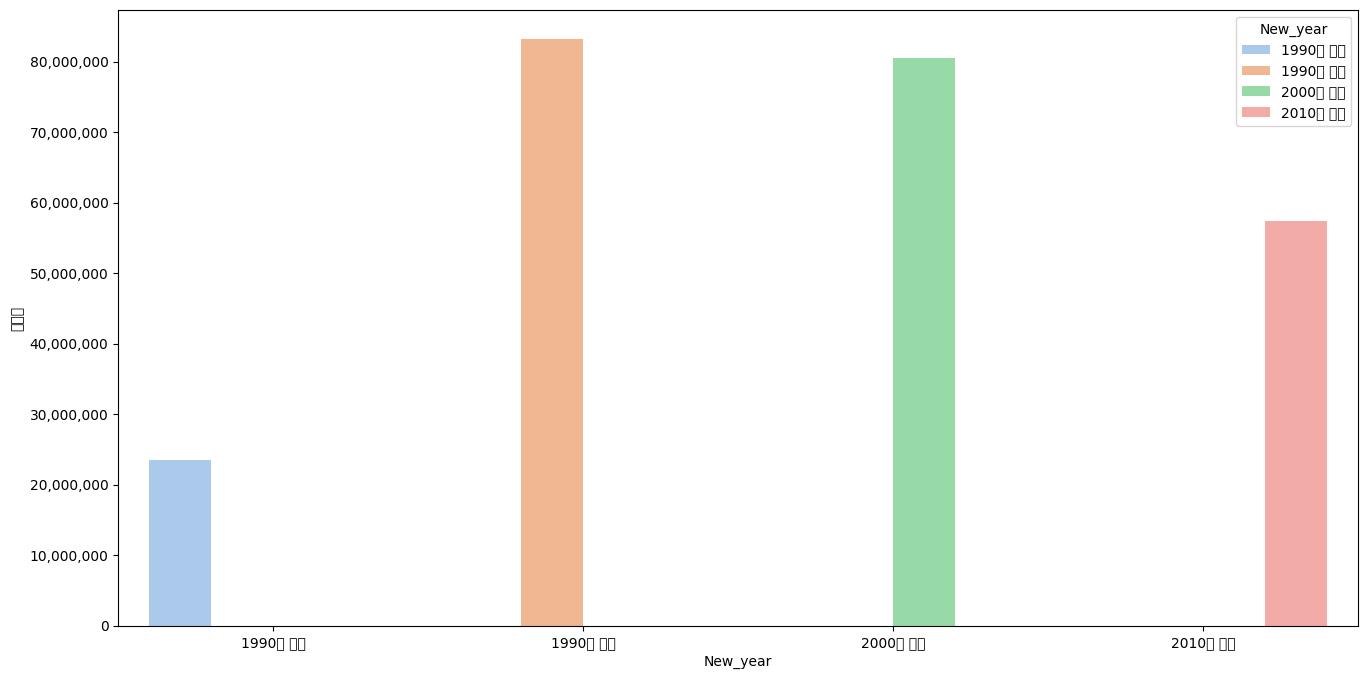

In [19]:
# 준공년도를 새로 범주화 하여 연도범주별 교통량 그래프 확인
plt.figure(figsize = (16, 8))
sns.barplot(x = 'New_year', y = '교통량', hue = 'New_year',  palette = 'pastel', data = sum_price)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.show()